In [1]:
import pandas as pd
import os
import re
import tabulate
import string
import matplotlib.pyplot as plt
import numpy as np
import spacy
import time
import nltk
import html
from nltk import FreqDist

from nltk.corpus import wordnet as wn
from nltk.stem import *
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer, sent_tokenize, word_tokenize, RegexpTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

def readData(filename):
    file = open(filename,'rt',encoding="utf8")
    file_read = file.read()
    file_read = file_read.replace('\n','')
    regex = re.compile("([\(\[]).*?([\)\]])")
    result = re.sub(regex,"",file_read)
    return result

biden_data = readData("biden.txt")
trump_data = readData("trump.txt")

print(len(biden_data))
print(len(trump_data))

860622
1146676


In [2]:
stop_words = set(stopwords.words('english'))
def get_words(data):
    data = "".join(data)
    data = word_tokenize(data)
    data = [w for w in data if not w in stop_words]
    data = [w for w in data if w.isalpha()]
    data = [w for w in data if len(w)>3]
    return data
wc = []
biden_words = get_words(biden_data)
wc.append(len(biden_words))
trump_words =  get_words(trump_data)
wc.append(len(trump_words))

lst = ['Joe Biden (2020)','Donald Trump (2020)']
word_count = pd.DataFrame({'Nominee':lst,'Words':wc})

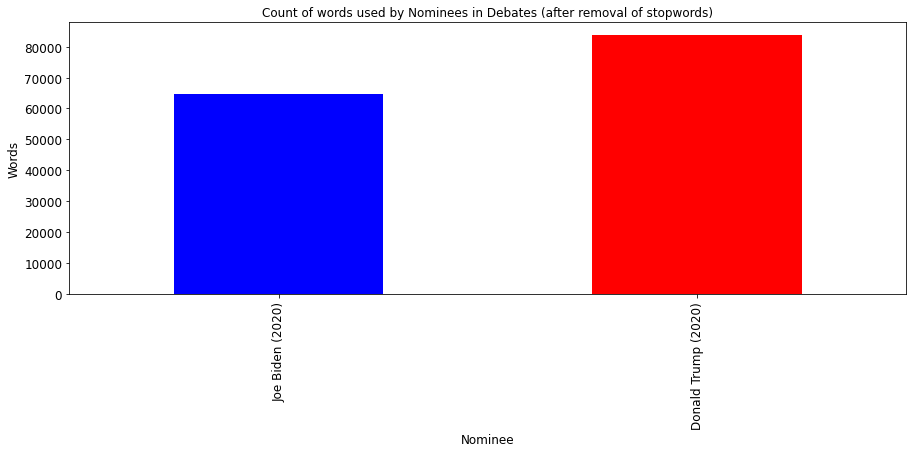

In [3]:
ax = word_count.plot(kind='bar',x='Nominee',y='Words',figsize=(15,5),legend = True, fontsize = 12,color=['blue', 'red'])
ax.set_xlabel("Nominee", fontsize=12)
ax.set_ylabel("Words", fontsize=12)
ax.get_legend().remove()
ax.set_title('Count of words used by Nominees in Debates (after removal of stopwords)')
plt.show()

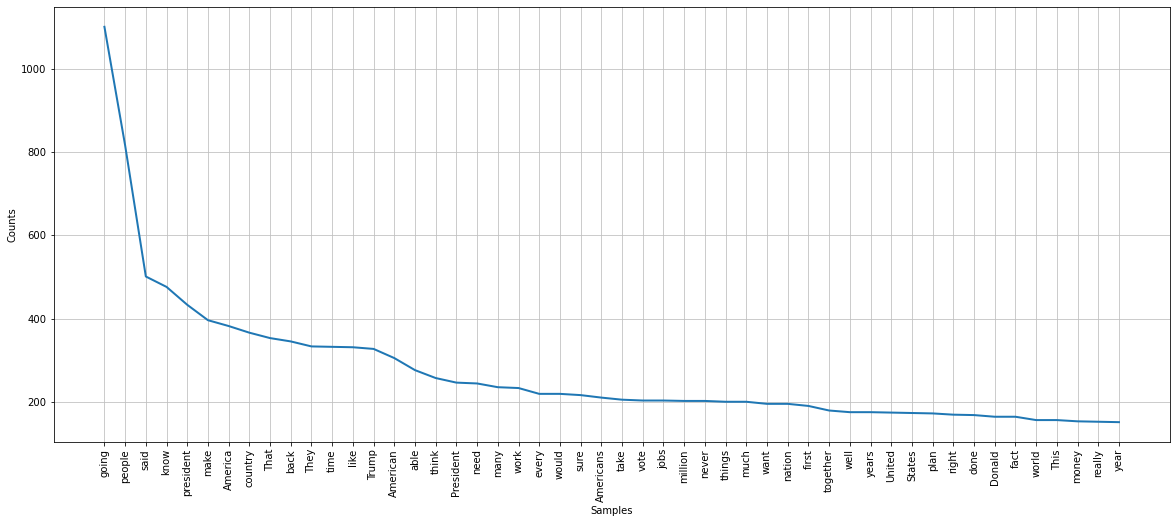

In [4]:
dist = FreqDist(biden_words)
items = dist.most_common(50)
plt.figure(figsize=(20, 8))
dist.plot(50,cumulative=False,linewidth=2)

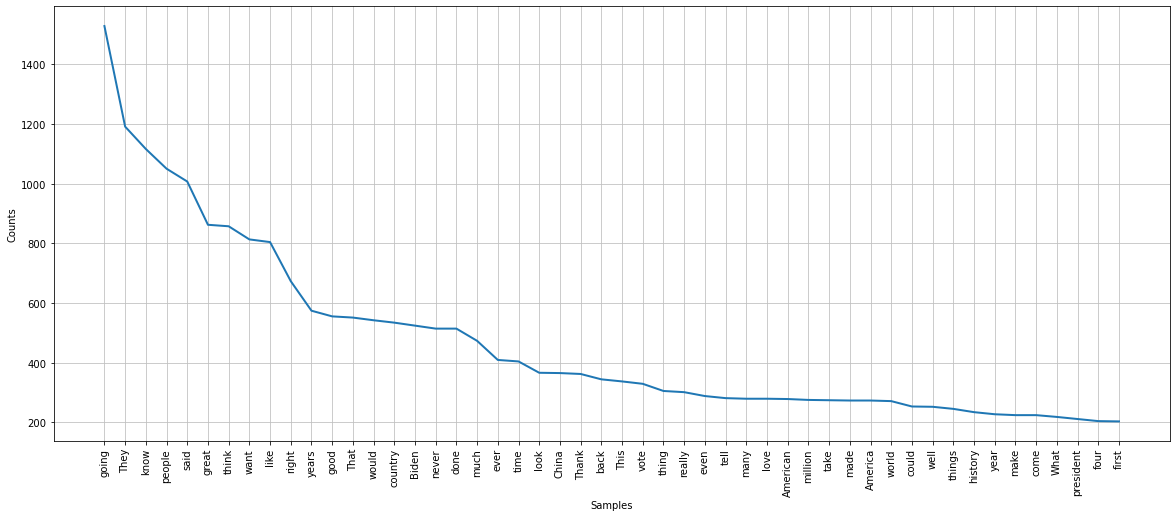

In [5]:
dist_trump = FreqDist(trump_words)
items = dist_trump.most_common(50)
plt.figure(figsize=(20, 8))
dist_trump.plot(50,cumulative=False,linewidth=2)

In [8]:
def getAdjectives(sentences):
    adjective_list = []
    grammar = "ADJP: {<RB. ?>+<JJ.?>}" 
    for p in sentences:
        words = nltk.word_tokenize(p)
        parser = nltk.RegexpParser(grammar) 
        t = parser.parse(nltk.pos_tag(words)) 
        for s in t.subtrees():
            if s.label() == "ADJP":
                for num in range(len(s)):
                    if(s[num][1]=="JJ" and s[num][0].isalpha()):
                        adjective_list.append(s[num][0])
    return adjective_list

Average length of the sentence spoken by Biden:  93.71178606800925
Average length of the sentence spoken by Trump:  63.892139663856035


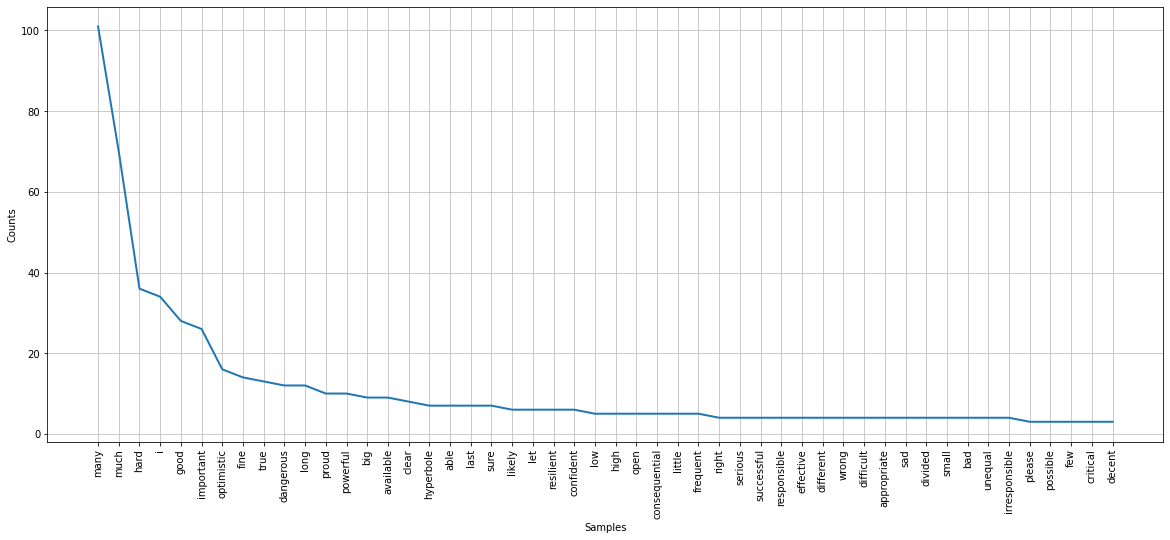

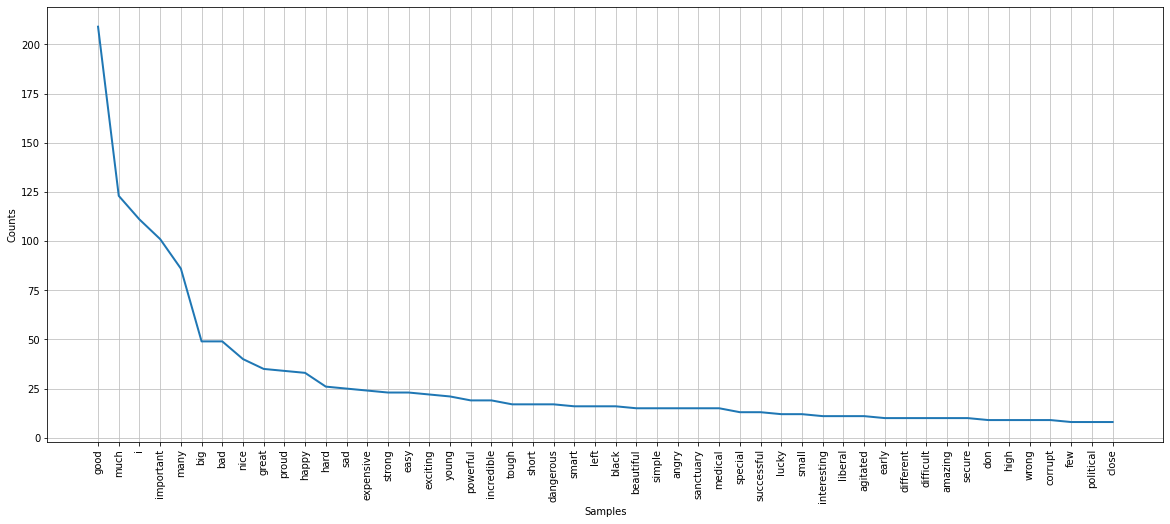

In [9]:
biden_sentences = nltk.sent_tokenize(biden_data)
biden_sentences = [w.lower() for w in biden_sentences]
trump_sentences = nltk.sent_tokenize(trump_data)
trump_sentences = [w.lower() for w in trump_sentences]

total_lens = 0
for i, sent in enumerate(biden_sentences):
    total_lens += len(sent)
biden_avg_sent_len = total_lens / i
print("Average length of the sentence spoken by Biden: ",biden_avg_sent_len)

total_lens = 0
for i, sent in enumerate(trump_sentences):
    total_lens += len(sent)
trump_avg_sent_len = total_lens / i
print("Average length of the sentence spoken by Trump: ",trump_avg_sent_len)

for sentences in biden_sentences,trump_sentences:
    adjective_list = getAdjectives(sentences)
    adj_dist = FreqDist(adjective_list)
    items = adj_dist.most_common(50)
    plt.figure(figsize=(20, 8))
    adj_dist.plot(50,cumulative=False,linewidth=2)

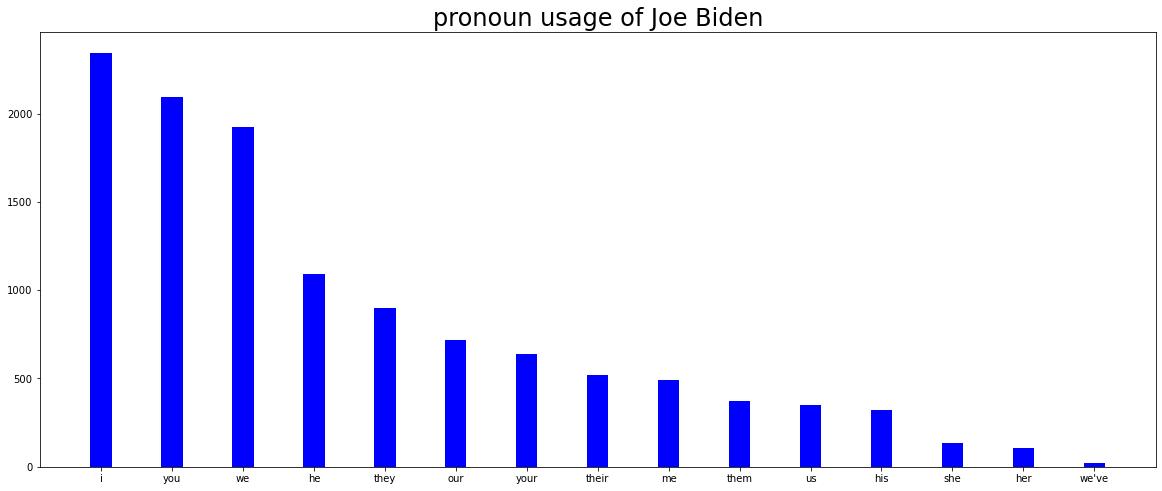

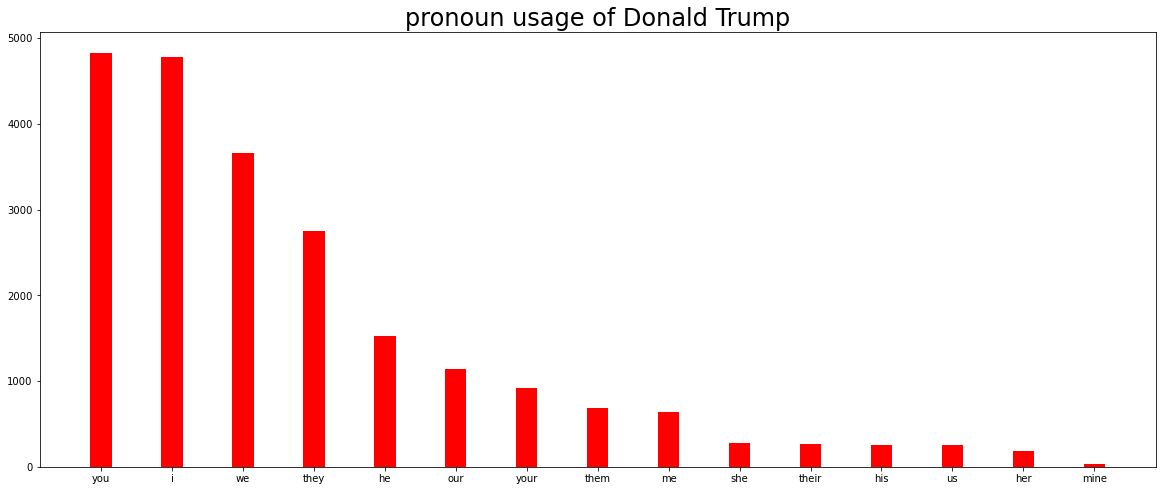

In [69]:
from string import punctuation
from collections import Counter

pronoun_list = ['i','me',"i've",'mine',
                'we','us',"we've",
                'our',"our's",'us',
                'you','your',
                'they',"they've",'them','their','themselves',
                'he','his','himself',
                'she','her','herself']

regex = r"(?<!\d)[?!,""-](?!\d)"
punc = str.maketrans('', '', re.sub("\'", '', punctuation))
ws = WhitespaceTokenizer()

def pronoun_check(data):
    data = "".join(data)
    data = data.replace("--","")
    data = data.replace("``","")
    data = data.replace("..."," ")
    data = data.replace("."," ")
    data = re.sub(regex, "", data)
    data = data.translate(punc)
    data = data.lower()
    data = ws.tokenize(data)
    data = [w for w in data if w in pronoun_list]
    return data

def pronoun_freq(data):
    data1 = pronoun_check(data)
#    data = nltk.pos_tag(data)
    d = {}
    for i in data1:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    
    return dict(Counter(d).most_common(15))

freq_lst_pronoun = []
for i in biden_data,trump_data:
    freq_lst_pronoun.append(pronoun_freq(i))

old_dict_pronoun={}
for i, d in enumerate(freq_lst_pronoun):
    old_dict_pronoun[i] = d
    
    
new_dict_pronoun = {0: 'Joe Biden (2020)', 1: 'Donald Trump (2020)'}

common_pronouns=dict((new_dict_pronoun[key], value) for (key, value) in old_dict_pronoun.items())
common_pronouns

title_lists =['pronoun usage of Joe Biden','pronoun usage of Donald Trump']
color=['blue', 'red']

for i in old_dict_pronoun:
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(old_dict_pronoun[i])), list(old_dict_pronoun[i].values()), align='center',width=0.3,color=color[i])
    plt.title(title_lists[i],fontsize=24)
    plt.xticks(range(len(old_dict_pronoun[i])), list(old_dict_pronoun[i].keys()))
    plt.show()
